In [1]:
import os
print(os.getcwd())
os.chdir(r'D:\Projects of Machine Learning\Linear Regression\Bike Sharing Assignment')
print(os.getcwd())

C:\Users\SARAH_KAI_JP
D:\Projects of Machine Learning\Linear Regression\Bike Sharing Assignment


***
---


# Bike Sharing Assignment

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Data Dictionary

In [2]:
new_file = open('Data_Description.txt', 'r')
with new_file as line:
	# Reads a specific line of text in the file. 
	line_text = line.read()
	print(line_text)

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


***
---

#### Importing Libraries and Warning

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, mean_squared_error

#### Step1: Reading and Understanding the dataset
Here, we are going to import the data set and will understand the dataset.

In [4]:
#creating a variable for the data set
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#checking the shape
data.shape

(730, 16)

So we are having **`730 rows`** and **`16 columns`**

In [6]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking for the null value
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

So we are having a clean data set with no null value

#### Step2: Exploratory Data Analysis

Firstly, will do Numerical analysis for all numerical variables

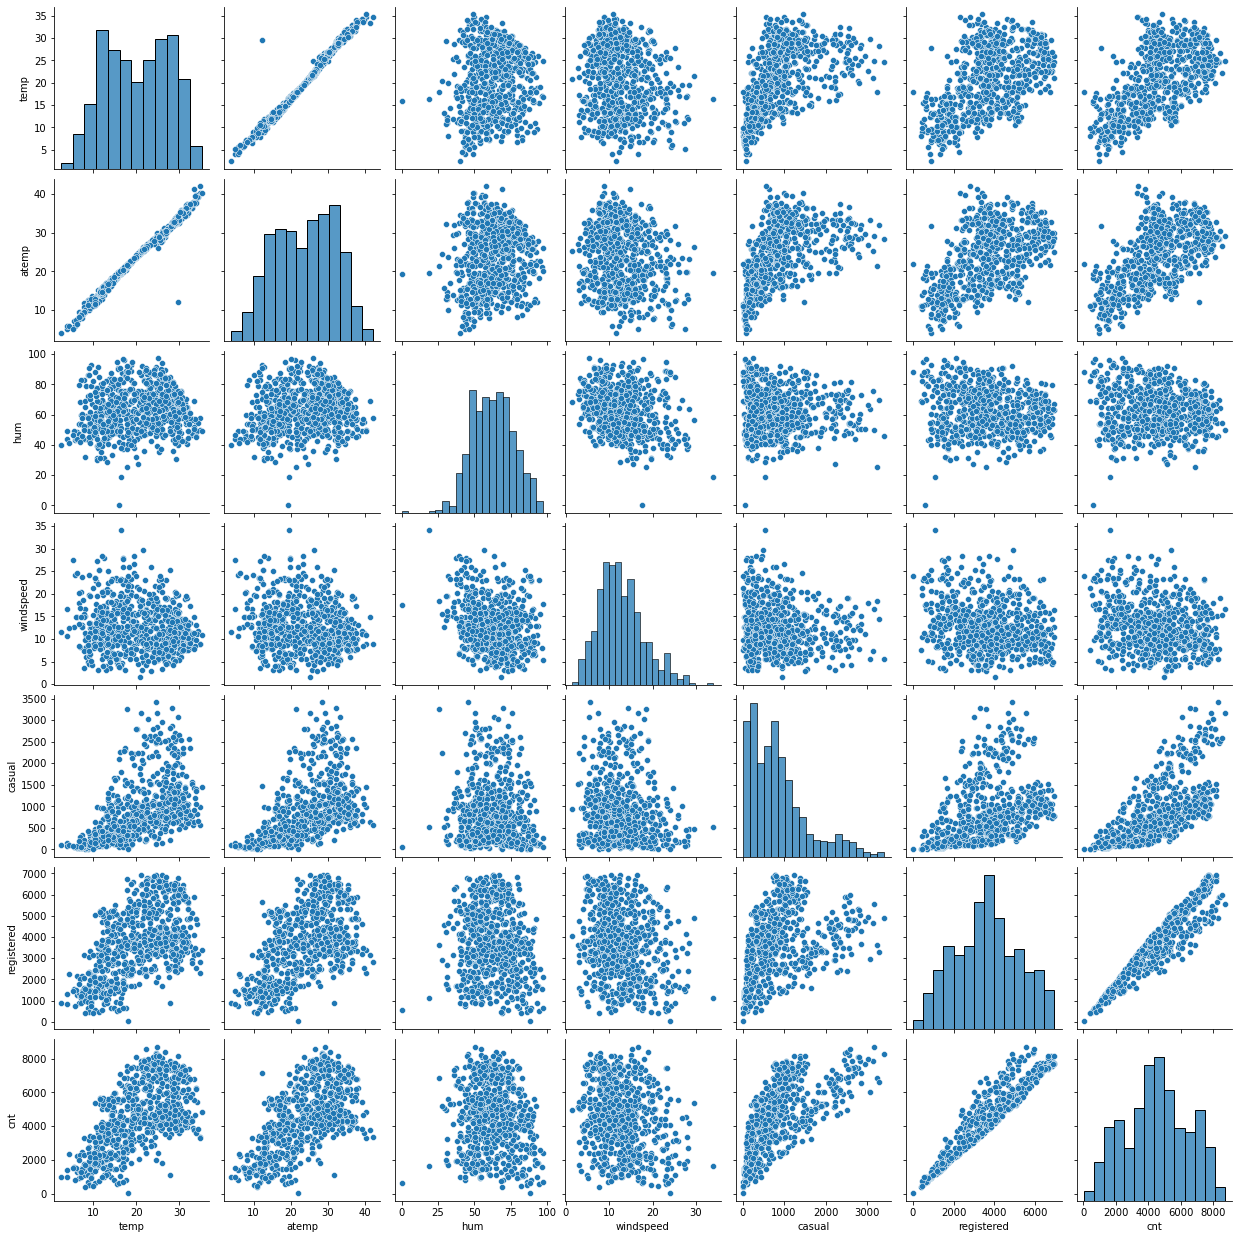

In [9]:
#from data dictionary we can find the numerical columns
num_col = ['temp', 'atemp','hum', 'windspeed', 'casual', 'registered','cnt']

#now we will plot a pair plot to check whether we have a linear relaionship between the variable or not

sns.pairplot(data[num_col])
plt.show()

There is linear relationship between temp and atemp, registered and cnt, cnt and causal

Now, we will analysis categorical variable

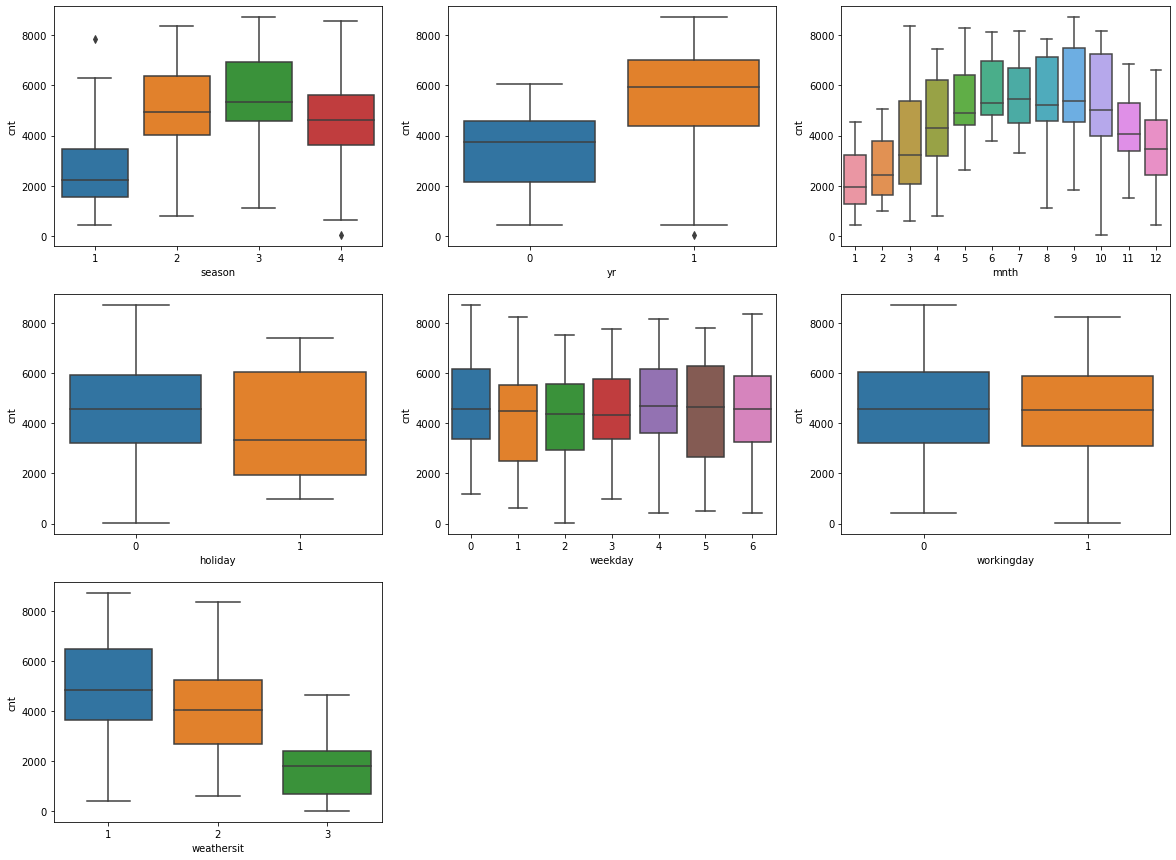

In [10]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x = data.season, y = data.cnt)
plt.subplot(3,3,2)
sns.boxplot(x = data.yr, y = data.cnt)
plt.subplot(3,3,3)
sns.boxplot(x = data.mnth, y = data.cnt)
plt.subplot(3,3,4)
sns.boxplot(x = data.holiday, y = data.cnt)
plt.subplot(3,3,5)
sns.boxplot(x = data.weekday, y = data.cnt)
plt.subplot(3,3,6)
sns.boxplot(x = data.workingday, y = data.cnt)
plt.subplot(3,3,7)
sns.boxplot(x = data.weathersit, y = data.cnt)
plt.show()

- Season: 1(spring) has the minimum median value for cnt as compared to 2(summer), 3(fall) and 4(winter)
- yr: There is signifiant growth
- mnth: There is a growth in rentals as months passby which can be also seen in Season
- holiday: User shows a wider spread. On normal days, the users are more than holidays
- Weekday: Weekdays or weekends do not show any specific trend here.
- Weathersit: Clearer weathers show a postive trend in the number of bike users.

Now, we will check for the correlation between the variable

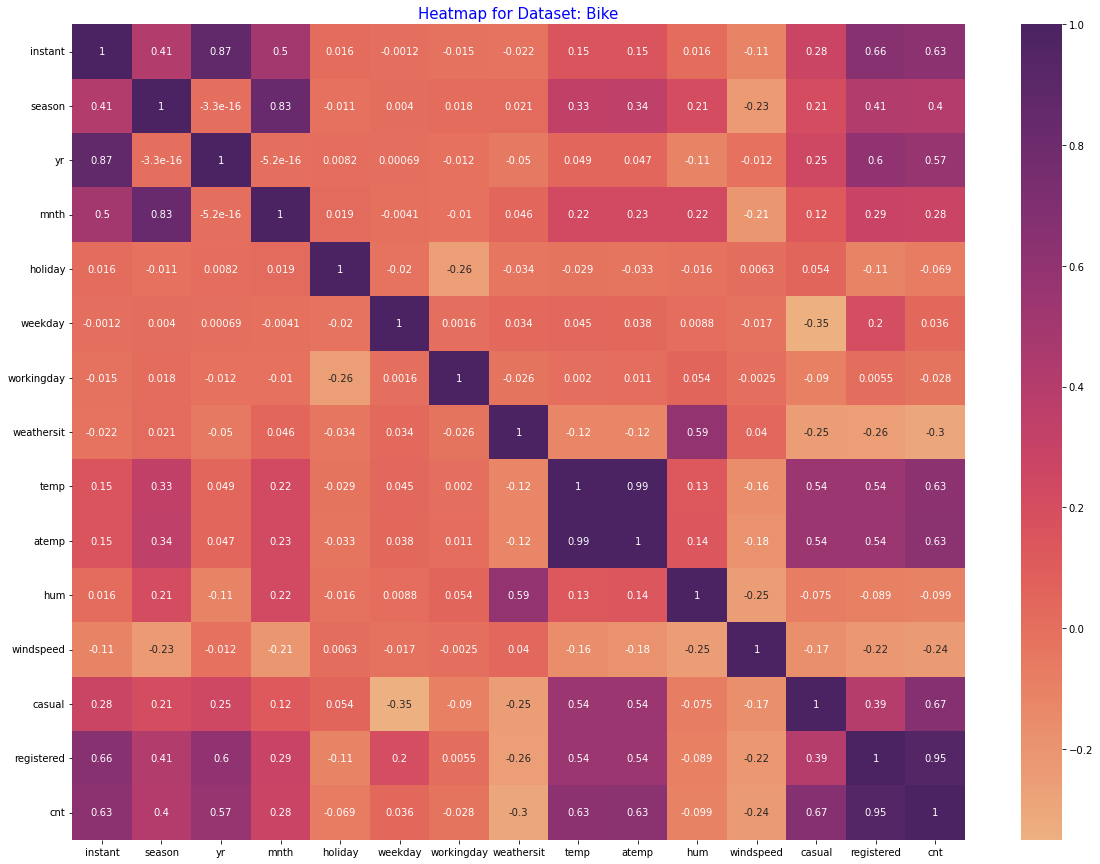

In [11]:
#plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True, cmap = 'flare')
plt.title("Heatmap for Dataset: Bike", fontdict = {'fontsize':15, 'color':'Blue'})
plt.show()

**Inference for the Heatmap**



Some variables are showing a high correlation, namely:

    - Temperatures
    - Season
    - Month
    - Registered
    - Causal
    - CNT
    - Instant

#### Step3: Data Preparation

Creating dummy variables

In [12]:
# For season
#Season column code with their description
data.season = data.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
#Creating dummy variable for season
season = pd.get_dummies(data.season, drop_first=True)
#Concatinating the dummy variable into original dataframe
data = pd.concat([data,season], axis = 1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [13]:
#For month
#Adding Months Column Description
data.mnth = data.mnth.map({1:'January',2:'February', 3:'March',4:'April',
                          5:'May',6:'June',7:'July',8:'August',9:'September',
                          10:'October',11:'November',12:'December'})
#Creating Dummy Variable for months
months = pd.get_dummies(data.mnth, drop_first=True)
#Concatinating months to original dataframe
data = pd.concat([data,months], axis =1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,December,February,January,July,June,March,May,November,October,September
0,1,01-01-2018,Spring,0,January,0,1,1,2,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,Spring,0,January,0,2,1,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,Spring,0,January,0,3,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,Spring,0,January,0,4,1,1,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,Spring,0,January,0,5,1,1,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [14]:
#for Weekday
#Adding weekday Column Description
data.weekday = data.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
                           4:'Friday',5:'Saturday',6:'Sunday'})
#Creating Dummy Variable for weekday
weekdays = pd.get_dummies(data.weekday, drop_first=True)
#concatinating weekdays with original dataframe
data = pd.concat([data,weekdays], axis= 1)
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,Spring,0,January,0,Tuesday,1,2,14.110847,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,Spring,0,January,0,Wednesday,1,2,14.902598,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,Spring,0,January,0,Thursday,1,1,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,Spring,0,January,0,Friday,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,Spring,0,January,0,Saturday,1,1,9.305237,...,0,0,0,0,0,1,0,0,0,0
5,6,06-01-2018,Spring,0,January,0,Sunday,0,1,8.378268,...,0,0,0,0,0,0,1,0,0,0
6,7,07-01-2018,Spring,0,January,0,Monday,0,2,8.057402,...,0,0,0,0,1,0,0,0,0,0
7,8,08-01-2018,Spring,0,January,0,Tuesday,1,2,6.765000,...,0,0,0,0,0,0,0,0,1,0
8,9,09-01-2018,Spring,0,January,0,Wednesday,1,1,5.671653,...,0,0,0,0,0,0,0,0,0,1
9,10,10-01-2018,Spring,0,January,0,Thursday,1,1,6.184153,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#For weathersit
#Adding weathersit column description
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light: Snow, Rain'})
#Creating a dummy variable weaather
weather = pd.get_dummies(data.weathersit, drop_first=True)
#concatinating weather with the original dataframe
data = pd.concat([data, weather],axis = 1)
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light: Snow, Rain",Mist
0,1,01-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.110847,...,0,0,0,0,0,0,1,0,0,1
1,2,02-01-2018,Spring,0,January,0,Wednesday,1,Mist,14.902598,...,0,0,0,0,0,0,0,1,0,1
2,3,03-01-2018,Spring,0,January,0,Thursday,1,Clear,8.050924,...,0,0,0,0,0,1,0,0,0,0
3,4,04-01-2018,Spring,0,January,0,Friday,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,Spring,0,January,0,Saturday,1,Clear,9.305237,...,0,0,0,1,0,0,0,0,0,0
5,6,06-01-2018,Spring,0,January,0,Sunday,0,Clear,8.378268,...,0,0,0,0,1,0,0,0,0,0
6,7,07-01-2018,Spring,0,January,0,Monday,0,Mist,8.057402,...,0,0,1,0,0,0,0,0,0,1
7,8,08-01-2018,Spring,0,January,0,Tuesday,1,Mist,6.765000,...,0,0,0,0,0,0,1,0,0,1
8,9,09-01-2018,Spring,0,January,0,Wednesday,1,Clear,5.671653,...,0,0,0,0,0,0,0,1,0,0
9,10,10-01-2018,Spring,0,January,0,Thursday,1,Clear,6.184153,...,0,0,0,0,0,1,0,0,0,0


Dropping the irrelevant and repeated columns

In [16]:
data.drop(columns = ['instant','dteday','season','mnth','weekday','weathersit','atemp','casual','registered']
         ,inplace = True)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light: Snow, Rain",Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Step4: Splitting Data into train and test 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
bike_train,bike_test = train_test_split(data, 
                                        train_size = 0.7, test_size = 0.3, 
                                        random_state = 100)

In [19]:
#Checking the shape of train and test dataset
print(f"Bike Train Shape is :{bike_train.shape}")
print(f"Bike Test Shape is :{bike_test.shape}")

Bike Train Shape is :(510, 29)
Bike Test Shape is :(219, 29)


#### Step5: Rescaling the Numerical Variables

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
rescaled = ['temp','hum','windspeed','cnt']
bike_train[rescaled] = scaler.fit_transform(bike_train[rescaled])
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light: Snow, Rain",Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


checking for the correlation after rescaling


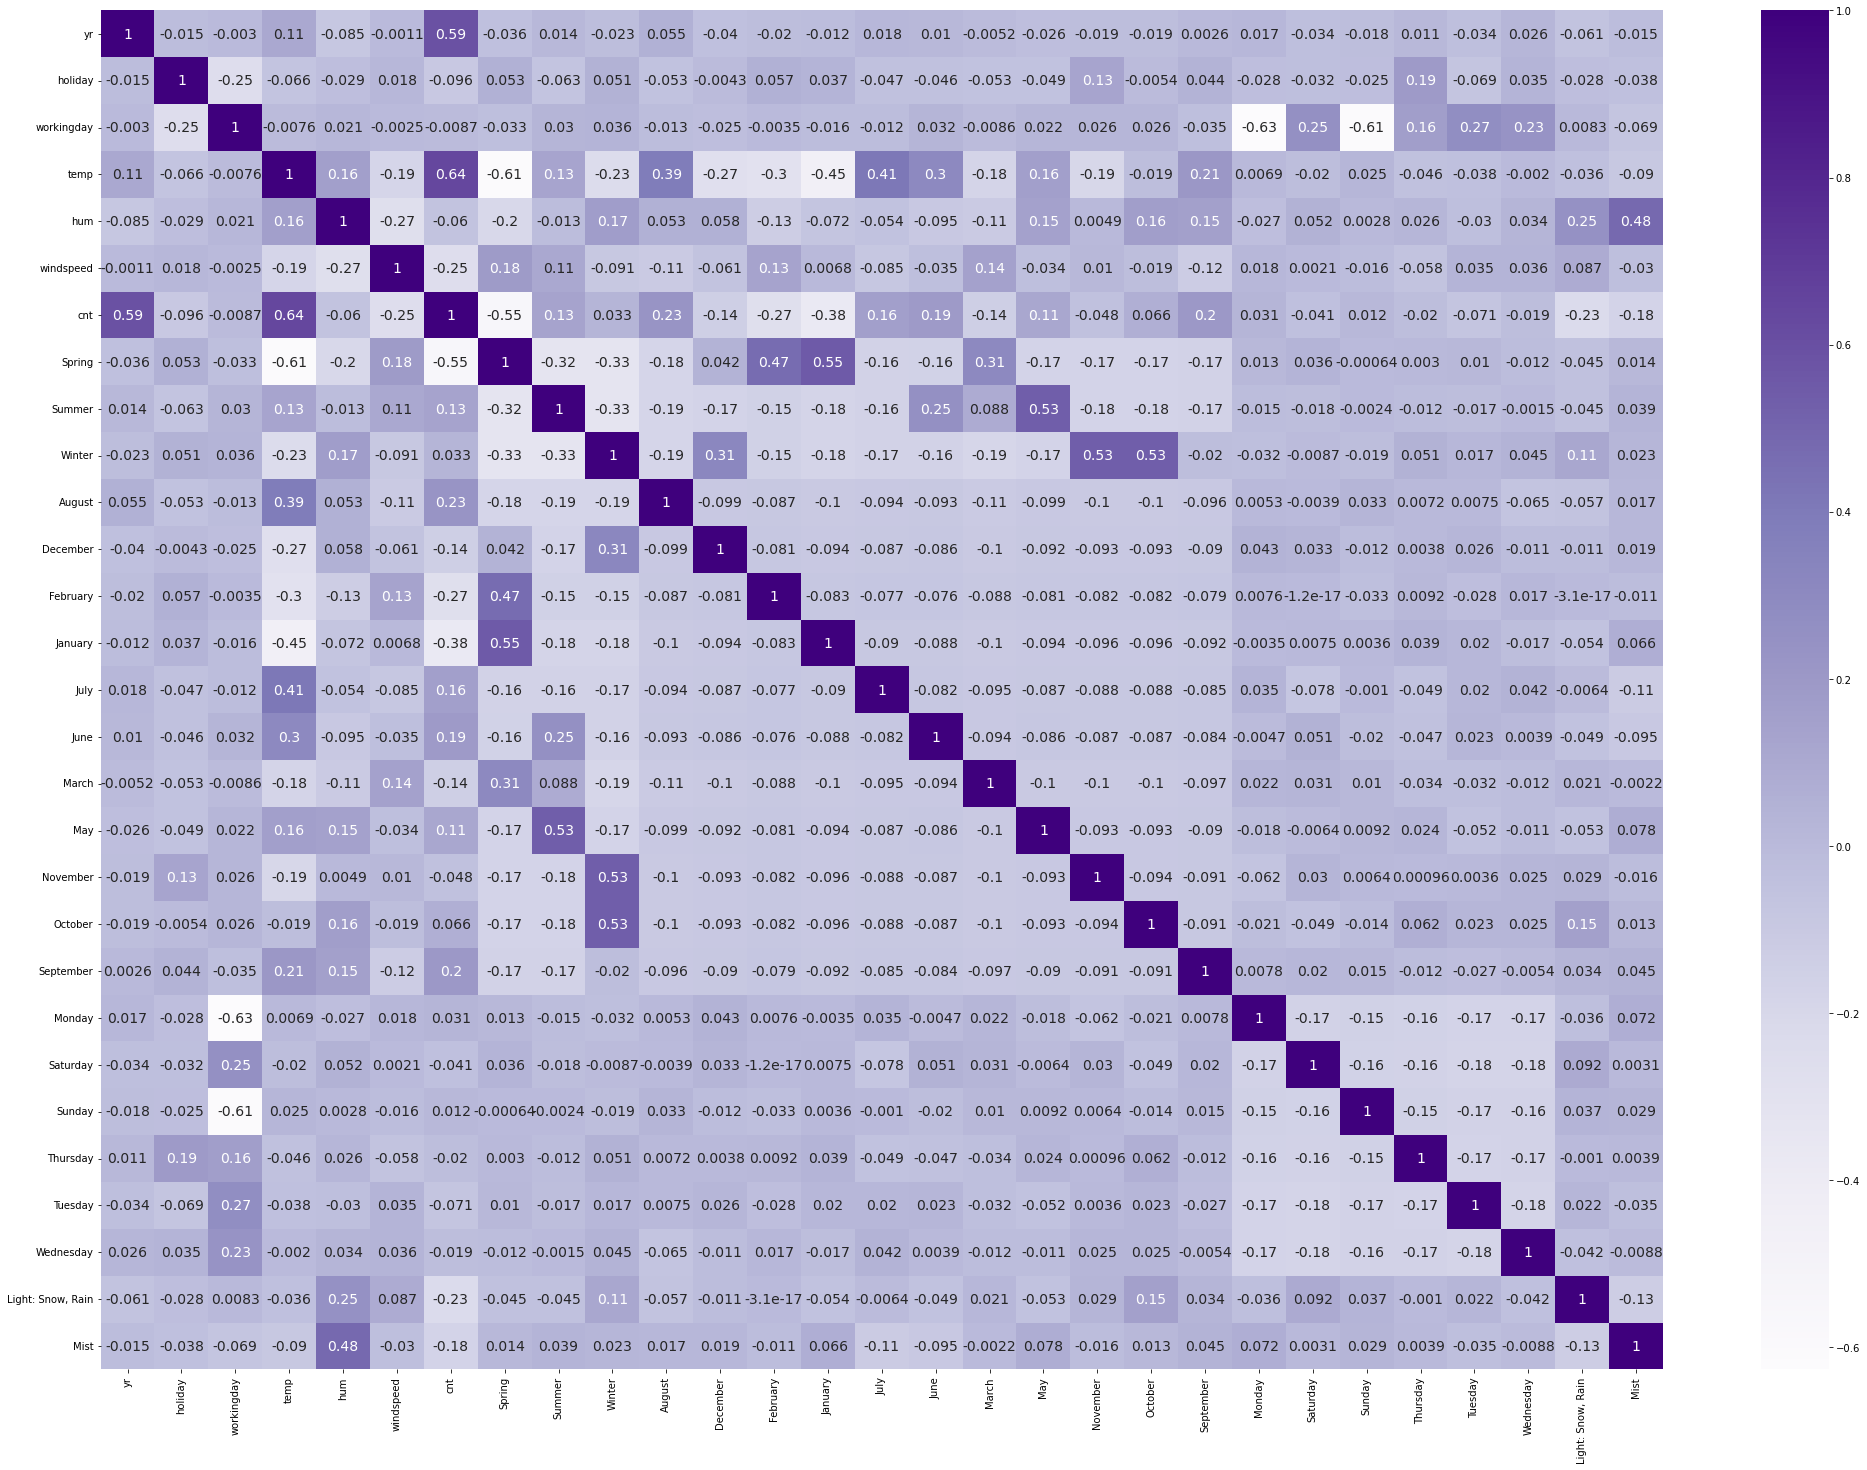

In [22]:
plt.figure(figsize = (35,25))
sns.heatmap(bike_train.corr(),annot= True, cmap ='Purples', annot_kws={"fontsize":14})
plt.show()

In [23]:
# Getting only numerical value for correlation
round(bike_train.corr(),4)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light: Snow, Rain",Mist
yr,1.0000,-0.0150,-0.0030,0.1073,-0.0848,-0.0011,0.5915,-0.0363,0.0139,-0.0226,...,-0.0188,0.0026,0.0165,-0.0342,-0.0177,0.0110,-0.0338,0.0260,-0.0608,-0.0155
holiday,-0.0150,1.0000,-0.2541,-0.0663,-0.0291,0.0176,-0.0960,0.0533,-0.0632,0.0507,...,-0.0054,0.0437,-0.0284,-0.0320,-0.0253,0.1906,-0.0692,0.0350,-0.0282,-0.0383
workingday,-0.0030,-0.2541,1.0000,-0.0076,0.0207,-0.0025,-0.0087,-0.0329,0.0305,0.0361,...,0.0259,-0.0347,-0.6268,0.2520,-0.6059,0.1631,0.2724,0.2343,0.0083,-0.0689
temp,0.1073,-0.0663,-0.0076,1.0000,0.1554,-0.1874,0.6435,-0.6060,0.1256,-0.2337,...,-0.0187,0.2075,0.0069,-0.0195,0.0253,-0.0463,-0.0377,-0.0020,-0.0361,-0.0902
hum,-0.0848,-0.0291,0.0207,0.1554,1.0000,-0.2669,-0.0600,-0.2011,-0.0132,0.1716,...,0.1620,0.1526,-0.0274,0.0519,0.0028,0.0264,-0.0305,0.0335,0.2450,0.4810
windspeed,-0.0011,0.0176,-0.0025,-0.1874,-0.2669,1.0000,-0.2538,0.1807,0.1101,-0.0906,...,-0.0190,-0.1217,0.0183,0.0021,-0.0163,-0.0575,0.0354,0.0356,0.0869,-0.0304
cnt,0.5915,-0.0960,-0.0087,0.6435,-0.0600,-0.2538,1.0000,-0.5489,0.1343,0.0326,...,0.0657,0.2013,0.0312,-0.0406,0.0125,-0.0196,-0.0712,-0.0189,-0.2266,-0.1755
Spring,-0.0363,0.0533,-0.0329,-0.6060,-0.2011,0.1807,-0.5489,1.0000,-0.3230,-0.3264,...,-0.1742,-0.1676,0.0130,0.0357,-0.0006,0.0030,0.0100,-0.0123,-0.0446,0.0140
Summer,0.0139,-0.0632,0.0305,0.1256,-0.0132,0.1101,0.1343,-0.3230,1.0000,-0.3281,...,-0.1751,-0.1685,-0.0153,-0.0178,-0.0024,-0.0122,-0.0172,-0.0015,-0.0452,0.0394
Winter,-0.0226,0.0507,0.0361,-0.2337,0.1716,-0.0906,0.0326,-0.3264,-0.3281,1.0000,...,0.5336,-0.0202,-0.0320,-0.0087,-0.0194,0.0506,0.0166,0.0451,0.1144,0.0231


Creating X and y

In [24]:
#Creating target variable in y_train and feature variables in X_train
y_train = bike_train.pop('cnt')
X_train = bike_train

#### Step6: Model Building

1st model: Using Recursive elimination feature (RFE)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=20)
selector = rfe.fit(X_train, y_train)
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
20,1,True,Monday
19,1,True,September
17,1,True,November
16,1,True,May
26,1,True,"Light: Snow, Rain"
12,1,True,January
11,1,True,February
10,1,True,December


In [27]:
#Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
selected_features

array(['yr', 'Sunday', 'Monday', 'September', 'November', 'May',
       'Light: Snow, Rain', 'January', 'February', 'December', 'July',
       'Winter', 'holiday', 'workingday', 'hum', 'windspeed', 'temp',
       'Spring', 'Summer', 'Mist'], dtype=object)

In [28]:
# Defining function for OLS and VIF
def ols_fit(y,X):
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

def vif(X):
    X_train_sm = sm.add_constant(X)
    vif = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index = X_train_sm.columns).reset_index()
    print(vif_frame.sort_values(by ='vif',ascending =False))

In [29]:
# Model1: 
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          9.48e-186
Time:                        18:01:59   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3935      0.08

Model 2:
    Creating 2nd Model by eliminating Monday and Sunday

In [30]:
selected_features = selected_features[(selected_features!='Monday') & (selected_features!='Sunday')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          7.76e-188
Time:                        18:01:59   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3552      0.03

Model 3:
    Creating 3rd model by eliminating May

In [31]:
selected_features = selected_features[selected_features!='May']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          1.60e-188
Time:                        18:01:59   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3443      0.03

Model 4: 
    Creating 4th model by eliminating February

In [32]:
selected_features = selected_features[selected_features!='February']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          4.55e-189
Time:                        18:02:00   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3329      0.03

Model 5: Creating 5th model by eliminating workingdat and November

In [33]:
selected_features = selected_features[(selected_features!='workingday') & (selected_features!='November')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.53e-189
Time:                        18:02:00   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     495   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3033      0.03

Model 6: Creating 6th model by eliminating December

In [34]:
selected_features = selected_features[selected_features!='December']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          4.45e-190
Time:                        18:02:00   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2957      0.03

Model 7: Creating 7th model by eliminating January

In [35]:
selected_features = selected_features[selected_features!='January']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          1.69e-190
Time:                        18:02:00   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2841      0.03

Model 8: Creating 8th model by eliminating Spring

In [36]:
selected_features = selected_features[selected_features!='Spring']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          3.89e-190
Time:                        18:02:00   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2257      0.02

Model 9: Creating 9th model by eliminating July

In [37]:
selected_features = selected_features[selected_features!='July']
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          7.80e-190
Time:                        18:02:00   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2256      0.02

As all the features variables are in the accepted range therefore next step will checking their VIF for multicolinearity

In [38]:
vif(X_train[selected_features])

                index        vif
0               const  44.985022
6                 hum   1.860200
10               Mist   1.548422
8                temp   1.272304
4              Winter   1.252922
3   Light: Snow, Rain   1.233072
9              Summer   1.191304
7           windspeed   1.179357
2           September   1.114657
1                  yr   1.027093
5             holiday   1.015164


So there is no multicolinearity between the variables as all the variables have VIF less than 5

#### Step7: Final Model

So, Creating the final model with feature variables: - yr - September - Light: Snow, Rain - Winter - Holiday - hum - Windspeed - temp - Summer - Mist

In [39]:
linear_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          7.80e-190
Time:                        18:02:00   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2256      0.02

#### Step8: Residual analysis

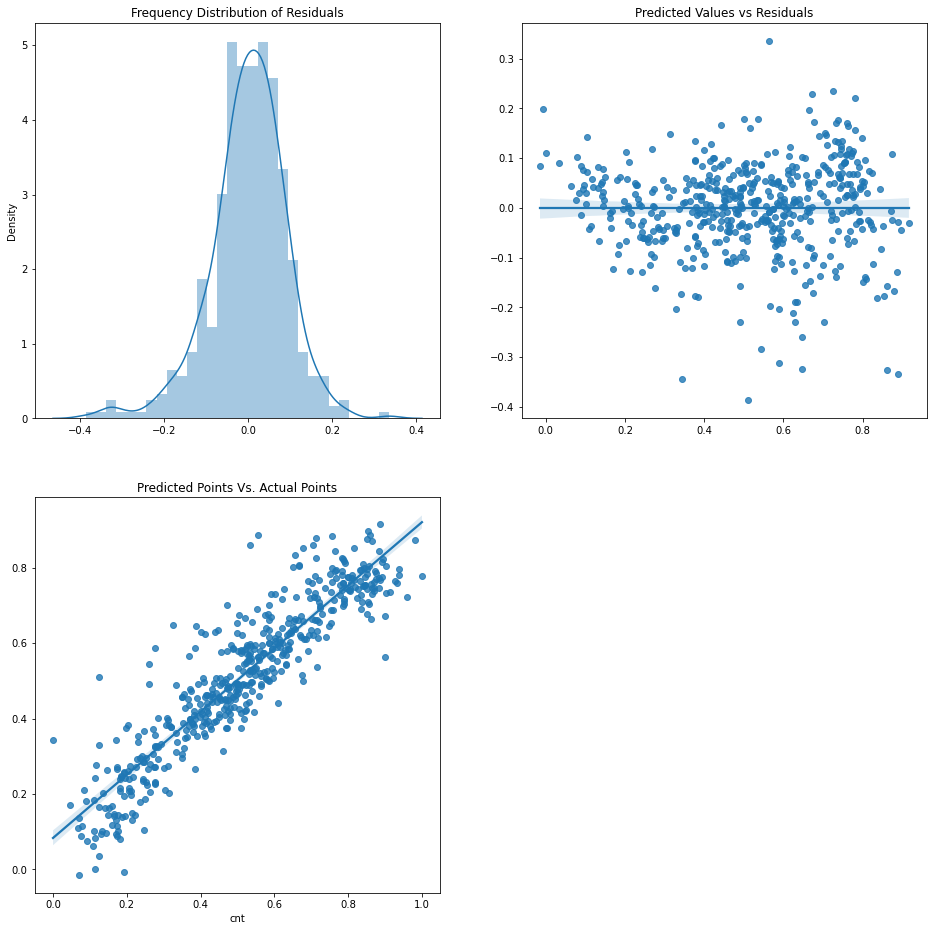

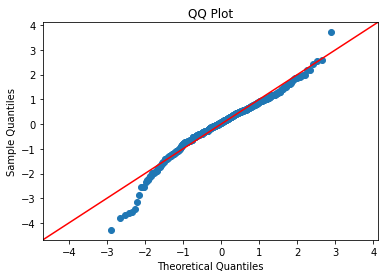

In [40]:
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = linear_model.predict(X_train_sm)

plt.figure(figsize = (16,16))

#checking for Normally distributed
plt.subplot(2,2,1)
sns.distplot(y_train-y_train_pred, bins=30)
plt.title('Frequency Distribution of Residuals')
#Checking for Independence of Errors
plt.subplot(2,2,2)
sns.regplot(y_train_pred,y_train-y_train_pred)
plt.title('Predicted Values vs Residuals')
#Checking for Homoscedasticity
plt.subplot(2,2,3)
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')

#Checking for normal distribution using qqplot
sm.qqplot(y_train-y_train_pred, fit=True,line='45')
plt.title ('QQ Plot')

plt.show()


- Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

#### Step9: Evaluation

In [41]:
bike_test[rescaled] = scaler.transform(bike_test[rescaled])
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test = X_test[selected_features]

X_test = sm.add_constant(X_test)
y_test_pred = linear_model.predict(X_test)

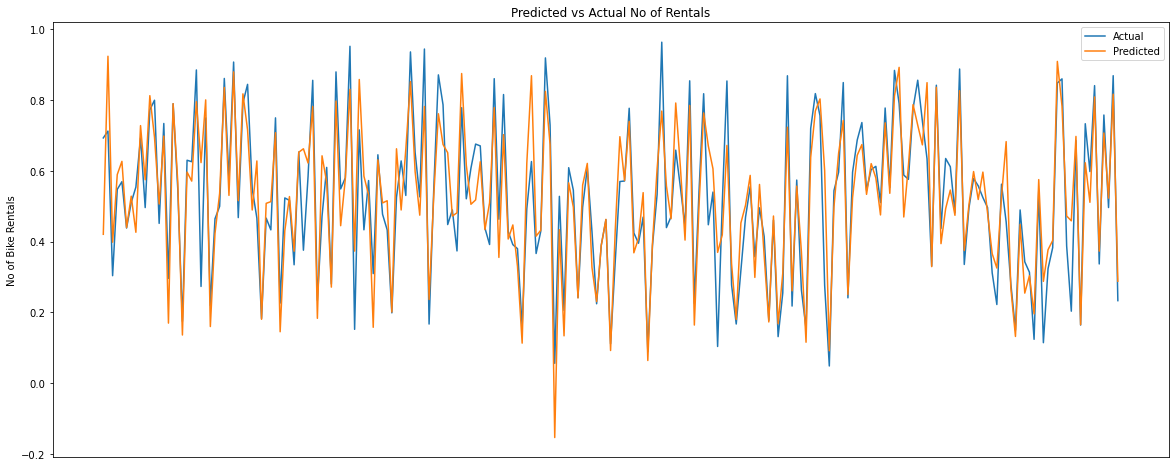

In [42]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

In [43]:
# R2 Score and Mean squared error
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print(f'R-squared for train data: {rsquared_train}')
print(f'R-squared for test data: {rsquared_test}')
print(f'Mean Squared Error: {mse}')

R-squared for train data: 0.8377024369203346
R-squared for test data: 0.8046410496371389
Mean Squared Error: 0.00927873122687518


Checking for the Coefficients of independent variables

In [44]:
from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr_estimator.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [0.22564594]


,MLR Coefficients
temp,0.570606
yr,0.228914
Winter,0.140200
September,0.106731
Summer,0.089525
Mist,-0.051831
holiday,-0.097964
hum,-0.173973
windspeed,-0.186706
"Light: Snow, Rain",-0.236675
